In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
H_Wildfires = pd.read_csv(r'..\data\Nov_10\Historical_Wildfires.csv')
H_Weather = pd.read_csv(r'..\data\Nov_10\HistoricalWeather.csv')
H_Weather_Fc = pd.read_csv(r'..\data\Nov_10\HistoricalWeatherForecasts.csv')
LandClass = pd.read_csv(r'..\data\Nov_10\LandClass.csv')
Vege = pd.read_csv(r'..\data\Nov_10\VegetationIndex.csv')

In [3]:
H_Wildfires.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
Unit_info2 = {'Data':['Estimated fire Area', 'Brightness', 'Raditative Power'],
        'Unit':['km^2','K','MW']}
data_type2 = pd.DataFrame(Unit_info2)
data_type2.style.hide_index()

Data,Unit
Estimated fire Area,km^2
Brightness,K
Raditative Power,MW


In [5]:
H_Weather.head(8)

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,14.485785,35.878704,27.341182,18.562212
5,2005-01-01,NSW,WindSpeed,8.002343e+05,1.354448,7.670482,3.323550,0.850048
6,2005-01-01,NT,Precipitation,1.357561e+06,0.000000,315.266815,9.884958,546.059262
7,2005-01-01,NT,RelativeHumidity,1.357561e+06,14.558820,95.683342,61.494675,584.201131


In [6]:
Unit_info = {'Data':['Precipitation', 'Relative humidity', 'Soil water content', 'Solar radiation','Temperature','Wind speed'],
        'Unit':['mm/day','%','m^3','MJ/day','C','m/s']}
data_type = pd.DataFrame(Unit_info)
data_type.style.hide_index()

Data,Unit
Precipitation,mm/day
Relative humidity,%
Soil water content,m^3
Solar radiation,MJ/day
Temperature,C
Wind speed,m/s


##### why no Precipitation & Soil water content here ?

In [7]:
H_Weather_Fc.head(8)

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002
5,2014-01-01,NT,SolarRadiation,5,1.349817e+06,18.851019,32.766205,28.016282,6.573279
6,2014-01-01,NT,Temperature,5,1.349817e+06,25.955570,39.907539,33.379110,6.605778
7,2014-01-01,NT,WindSpeed,5,1.349817e+06,1.192912,12.156700,4.740253,4.871655


##### Every Unit is '%'

In [8]:
LandClass

,Region,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea
0,NSW,6.2,43.6,13.0,0.3,0.2,0.2,0.1,14.7,6.8,0.3,0.5,3.7,10.3,0.1
1,NT,18.1,48.9,0.1,0.0,0.4,0.1,0.1,1.0,7.7,0.1,0.1,13.6,9.3,0.5
2,QL,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3
3,SA,24.1,54.8,5.8,0.1,4.8,1.2,0.1,0.3,1.3,0.1,0.1,1.4,5.3,0.6
4,TA,0.7,23.8,1.2,0.2,0.1,1.9,1.4,50.1,0.6,1.1,7.2,1.5,7.2,3.0
5,WA,31.3,43.5,5.6,0.0,1.0,0.4,0.0,1.2,2.4,0.2,0.1,4.8,8.7,0.8
6,VI,1.4,35.0,23.3,1.0,0.1,0.6,0.3,23.9,3.8,0.3,1.5,2.7,5.2,0.9


#### The row is monthly basis

##### A Vegetation Index (VI) is a spectral transformation of two or more bands designed to enhance the contribution of vegetation properties and allow reliable spatial and temporal inter-comparisons of terrestrial photosynthetic activity and canopy structural variations

In [9]:
Vege.head(13)

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151
5,NSW,6/1/2005,0.399652,0.9602,-0.2,0.188570,0.035559
6,NSW,7/1/2005,0.451143,0.9555,-0.2,0.174267,0.030369
7,NSW,8/1/2005,0.498218,0.9782,-0.2,0.181103,0.032798
8,NSW,9/1/2005,0.505553,0.9805,-0.2,0.204202,0.041698
9,NSW,10/1/2005,0.439443,0.9814,-0.2,0.214671,0.046084


In [10]:
Vege.tail()

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
1325,WA,6/1/2020,0.263760,0.9886,-0.2,0.129103,0.016667
1326,WA,7/1/2020,0.265321,0.9941,-0.2,0.148663,0.022101
1327,WA,8/1/2020,0.255785,0.9692,-0.2,0.155347,0.024133
1328,WA,9/1/2020,0.234510,0.9849,-0.2,0.126898,0.016103
1329,WA,10/1/2020,0.213640,0.9782,-0.2,0.099860,0.009972


In [11]:
H_Wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [12]:
from scipy.stats import norm

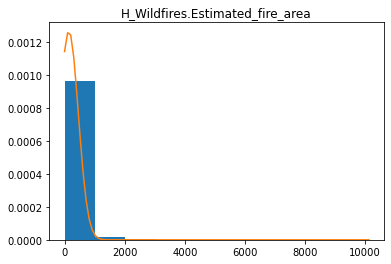

In [13]:
plt.hist(H_Wildfires.Estimated_fire_area, density=True)
mean,std = norm.fit (H_Wildfires.Estimated_fire_area)
x = np.linspace(H_Wildfires.Estimated_fire_area.min(),H_Wildfires.Estimated_fire_area.max(),100)
y = norm.pdf(x, mean, std)
plt.plot(x,y)
plt.title('H_Wildfires.Estimated_fire_area')
plt.show()

#### It is reasonable that large area is affected by fire.

In [14]:
H_Wildfires.Estimated_fire_area.nlargest(10)

6706     10120.943170
23537     8451.287070
23538     6761.264876
25356     6203.754148
23536     6025.035206
6707      5818.988535
23535     5722.408968
4337      5183.713045
6709      5035.357648
6717      4997.535176
Name: Estimated_fire_area, dtype: float64

### Doubts on 24/Nov/2020 by Huijo

1. How to deal with 'Date' Format?
2. How to use different source of input data
3. Is it right to feed all input such as confidence of Mean/Std/Var
4. What is replaced in the History of Wildfires?
5. Should we split input based on Region and train them separately?
6. What is the purpose of History of weather forcast and why there are only 4 parameters?
    ☞ If this is only prediction, why there is statistic values, sucah as min, max, mean, var?


In [15]:
H_Wildfires.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

#### There are null values in Std_confidence & Var_confidence column

In [16]:
H_Wildfires_Null = []
for i in H_Wildfires.columns:
    if H_Wildfires[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        H_Wildfires_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',H_Wildfires_Null)

No Null in Region column
No Null in Date column
No Null in Estimated_fire_area column
No Null in Mean_estimated_fire_brightness column
No Null in Mean_estimated_fire_radiative_power column
No Null in Mean_confidence column
There is null in Std_confidence column
There is null in Var_confidence column
No Null in Count column
No Null in Replaced column
Columns with null: ['Std_confidence', 'Var_confidence']


In [17]:
H_Wildfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
Region                                 26406 non-null object
Date                                   26406 non-null object
Estimated_fire_area                    26406 non-null float64
Mean_estimated_fire_brightness         26406 non-null float64
Mean_estimated_fire_radiative_power    26406 non-null float64
Mean_confidence                        26406 non-null float64
Std_confidence                         24199 non-null float64
Var_confidence                         24199 non-null float64
Count                                  26406 non-null int64
Replaced                               26406 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


#### If Std is null, Var is also null

In [18]:
H_Wildfires['Std_confidence'][H_Wildfires['Std_confidence']==False]

96       0.0
185      0.0
231      0.0
239      0.0
272      0.0
        ... 
21192    0.0
23076    0.0
23675    0.0
23999    0.0
24706    0.0
Name: Std_confidence, Length: 181, dtype: float64

In [19]:
H_Wildfires['Var_confidence'][H_Wildfires['Var_confidence']==False]

96       0.0
185      0.0
231      0.0
239      0.0
272      0.0
        ... 
21192    0.0
23076    0.0
23675    0.0
23999    0.0
24706    0.0
Name: Var_confidence, Length: 181, dtype: float64

### Delete rows with zero confidence

In [20]:
H_Wildfires2=H_Wildfires.copy()

In [21]:
H_Wildfires2.dropna() 

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N


In [22]:
H_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242781 entries, 0 to 242780
Data columns (total 8 columns):
Date                   242781 non-null object
Region                 242781 non-null object
Parameter              242781 non-null object
count()[unit: km^2]    242781 non-null float64
min()                  242781 non-null float64
max()                  242781 non-null float64
mean()                 242781 non-null float64
variance()             242781 non-null float64
dtypes: float64(5), object(3)
memory usage: 14.8+ MB


In [23]:
H_Weather_Null = []
for i in H_Weather.columns:
    if H_Weather[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        H_Weather_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',H_Weather_Null)

No Null in Date column
No Null in Region column
No Null in Parameter column
No Null in count()[unit: km^2] column
No Null in min() column
No Null in max() column
No Null in mean() column
No Null in variance() column
Columns with null: []


In [24]:
H_Weather_Fc_Null = []
for i in H_Weather_Fc.columns:
    if H_Weather_Fc[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        H_Weather_Fc_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',H_Weather_Fc_Null)

No Null in Date column
No Null in Region column
No Null in Parameter column
No Null in Lead time column
No Null in count()[unit: km^2] column
No Null in min() column
No Null in max() column
No Null in mean() column
No Null in variance() column
Columns with null: []


In [25]:
Vege_Null = []
for i in Vege.columns:
    if Vege[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        Vege_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',Vege_Null)

No Null in Region column
No Null in Date column
No Null in Vegetation_index_mean column
No Null in Vegetation_index_max column
No Null in Vegetation_index_min column
No Null in Vegetation_index_std column
No Null in Vegetation_index_variance column
Columns with null: []


In [26]:
H_Wildfires.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [27]:
H_Wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [43]:
H_Wildfires.dtypes[H_Wildfires.dtypes!=object].index

Index(['Estimated_fire_area', 'Mean_estimated_fire_brightness',
       'Mean_estimated_fire_radiative_power', 'Mean_confidence',
       'Std_confidence', 'Var_confidence', 'Count'],
      dtype='object')

In [44]:
H_Wildfires[H_Wildfires.dtypes[H_Wildfires.dtypes!=object].index]

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count
0,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3
1,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8
2,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3
3,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5
4,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3
...,...,...,...,...,...,...,...
26401,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11
26402,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16
26403,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39
26404,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38


### Data distribution of History of Wildfires

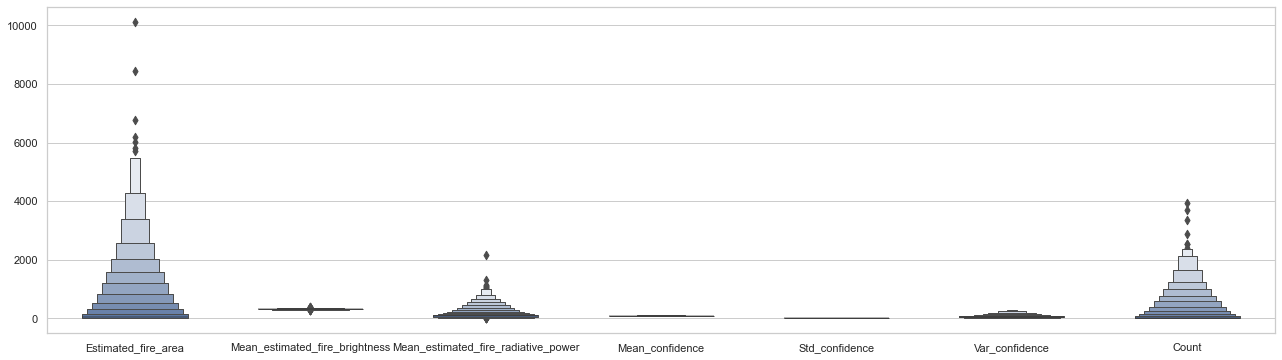

In [77]:
from seaborn import set_theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(22, 6))
sns.boxenplot(color="b", order=list(H_Wildfires.columns[H_Wildfires.dtypes != object]),
              scale="linear", saturation=0.7, 
    width=0.6,data=H_Wildfires[H_Wildfires.dtypes[H_Wildfires.dtypes != object].index])